In [37]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy

In [38]:
good_img = cv2.resize(cv2.imread("/content/drive/MyDrive/Dataset/good.png"),[300,300])
defect1_img = cv2.resize(cv2.imread("/content/drive/MyDrive/Dataset/defect1.png"),[300,300])
defect2_img = cv2.resize(cv2.imread("/content/drive/MyDrive/Dataset/defect2.png"),[300,300])
defect3_img = cv2.resize(cv2.imread("/content/drive/MyDrive/Dataset/defect3.png"),[300,300])
defect4_img = cv2.resize(cv2.imread("/content/drive/MyDrive/Dataset/defect4.png"),[300,300])

In [39]:
def defect(defect_img):
  #cv2_imshow(good_img)
  #cv2_imshow(defect_img)
  diff = cv2.bitwise_not(good_img - defect_img)
  #cv2_imshow(diff)
  count = 0
  h = diff.shape[0]
  w = diff.shape[1]
  for y in range(0, h):
    for x in range(0, w):
      if diff[y,x].all() == 0:
        count = count+1
      else:
        continue
  if count > 1:
    print("The defect is a flash")
    return diff
  else:
    print("The defect is a cut")
    diff1 = cv2.bitwise_not(defect_img - good_img)
    return diff1

In [40]:
def color(defect_img, diff):
  #cv2_imshow(diff)
  black=numpy.where((diff[:,:,0]==0) & (diff[:,:,1]==0) & (diff[:,:,2]==0))
  defect_img[black] = (255,0,0)
  cv2_imshow(defect_img)
  return

Expected Output: Flash
The defect is a flash


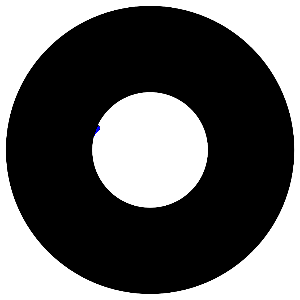


Expected Output: Cut
The defect is a cut


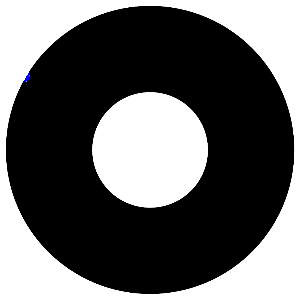


Expected Output: Cut
The defect is a cut


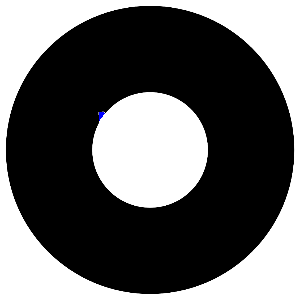


Expected Output: Flash
The defect is a flash


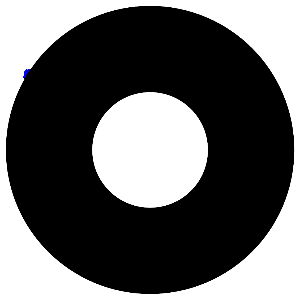

In [41]:
print("Expected Output: Flash")#defect1.png
color(defect1_img, defect(defect1_img))
print()
print("Expected Output: Cut")#defect2.png
color(defect2_img, defect(defect2_img))
print()
print("Expected Output: Cut")#defect3.png
color(defect3_img, defect(defect3_img))
print()
print("Expected Output: Flash")#defect4.png
color(defect4_img, defect(defect4_img))